In [41]:
import numpy as np
import matplotlib.pyplot as plt



# Parameters
a = 0.0  # Coefficient for x^3 term
b = 1.0  # Coefficient for x^4 term
beta = 1.0  # Inverse temperature

# Step 1: Load the data and process it as before
all_positions = []
current_block = []

with open('condizioni_iniziali.dat', 'r') as f:  # Replace 'your_file.txt' with your actual filename
    for line in f:
        line = line.strip()
        if line and '-' not in line:  # Ignore separator lines
            position = float(line.split()[0])  # Extract the position (first column)
            current_block.append(position)
        elif current_block:  # If we hit a separator, save the block
            all_positions.append(current_block)
            current_block = []

    if current_block:  # Save the last block if no separator at end
        all_positions.append(current_block)

# Step 2: Calculate differences within each block
position_diffs = []
for block in all_positions:
    if len(block) > 1:
        diffs = np.diff(block)
        position_diffs.extend(diffs)

# Step 3: Plot histogram of position differences
plt.hist(position_diffs, bins=40, density=True, alpha=0.6, edgecolor='black', label='Position Differences')

# Step 4: Define the energy function and density based on Boltzmann distribution
def energy(x, a, b):
    return (x-1)**2/2 + a * (x-1)**3/3 + b * (x-1)**4/4

def density(x, a, b, beta):
    return np.exp(-beta * energy(x, a, b))

# Generate x values for plotting the density
x_vals = np.linspace(min(position_diffs), max(position_diffs), 500)
density_vals = density(x_vals, a, b, beta)
density_vals /= np.trapz(density_vals, x_vals)  # Normalize the density

# Step 5: Plot the density function
plt.plot(x_vals, density_vals, color='red', linewidth=2, label='Energy-based Density')

# Add labels and legend
plt.xlabel('Difference between consecutive positions')
plt.ylabel('Probability Density')
plt.title('Histogram of Position Differences with Energy-based Density')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'condizioni_iniziali.dat'

10004196
(10000, 66)


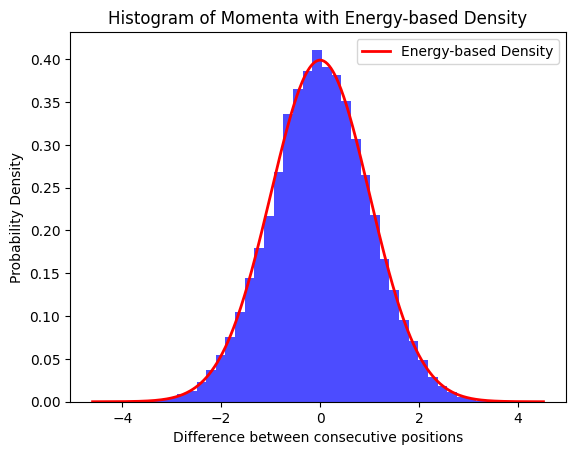

In [3]:
import numpy as np
import os
import random

def read_conditions(filename, num_condizioni, neq):
    # Verifica se il file esiste
    if not os.path.exists(filename):
        print("Errore nell'apertura del file per lettura!")
        return None
    
    # Dimensione di una condizione in byte
    dimensione_condizione = neq * np.dtype('float64').itemsize
    
    # Ottieni la dimensione totale del file
    file_size = os.path.getsize(filename)
    
    # Calcola il numero di condizioni nel file
    numero_condizioni_tot = file_size // dimensione_condizione

    print(numero_condizioni_tot)
    
    if num_condizioni > numero_condizioni_tot:
        print("Errore: il numero di condizioni richiesto eccede il numero di condizioni nel file.")
        return None

    # Inizializza il vettore per le condizioni
    condizioni = np.empty(num_condizioni * neq, dtype='float64')

    # Apri il file in modalità binaria
    with open(filename, 'rb') as inFile:
        for i in range(num_condizioni):
            # Seleziona un indice casuale
            indice_casuale = random.randint(0, numero_condizioni_tot - 1)
            
            # Calcola l'offset dell'indice
            offset = indice_casuale * dimensione_condizione
            
            # Posizionarsi nel file all'offset desiderato
            inFile.seek(offset)
            
            # Leggi la condizione e mettila nel vettore
            condition_data = np.fromfile(inFile, dtype='float64', count=neq)
            if condition_data.size != neq:
                print("Errore durante la lettura del file!")
                return None
            
            condizioni[i * neq : (i + 1) * neq] = condition_data

    return condizioni


filename = "condizioni.bin"
num_condizioni = 10000  # Numero di condizioni da leggere
N=30
dim=1
neq= (N+2)*2*dim + 2

condizioni = read_conditions(filename, num_condizioni, neq)
if condizioni is not None:
    cond_t=condizioni.reshape(num_condizioni,neq)[:,:neq]
print(cond_t.shape)


import numpy as np
import matplotlib.pyplot as plt

# Supponendo che `cond_t` sia già definito
# Estrai solo le colonne di `x` per ciascuna catena
x_values = cond_t[:, ::2]  # Prende solo le colonne alternate, che sono i valori `x`
p_values=np.concatenate(cond_t[:, 3:-2:2])
xival=np.concatenate(cond_t[:, -2:])
# Calcola le differenze tra valori successivi di `x` per ciascuna catena (prima dimensione)
diff_x_all = [np.diff(x_chain) for x_chain in x_values]

# Unisci tutte le differenze in un singolo array per l'istogramma
diff_x_all = np.concatenate(diff_x_all)

# Crea l'istogramma delle differenze
plt.hist(xival, bins=40, density=True, alpha=0.7, color='blue')

def energy(x, a, b):
    return x**2/2#(x-1)**2/2 + a * (x-1)**3/3 + b * (x-1)**4/4

def density(x, a, b, beta):
    return np.exp(-beta * energy(x, a, b))

# Generate x values for plotting the density
x_vals = np.linspace(min(p_values), max(p_values), 500)
density_vals = density(x_vals, 0, 1, 1)
density_vals /= np.trapz(density_vals, x_vals)  # Normalize the density

# Step 5: Plot the density function
plt.plot(x_vals, density_vals, color='red', linewidth=2, label='Energy-based Density')

# Add labels and legend
plt.xlabel('Difference between consecutive positions')
plt.ylabel('Probability Density')
plt.title('Histogram of Momenta with Energy-based Density')
plt.legend()
plt.show()

In [5]:
cond_t[0,62:]

array([31.,  0.])

0    11991
Name: changepoint, dtype: int64
0    11991
Name: changepoint, dtype: int64
0    11971
Name: changepoint, dtype: int64
0    11971
Name: changepoint, dtype: int64
0    11967
Name: changepoint, dtype: int64
0    11967
Name: changepoint, dtype: int64
0    12014
Name: changepoint, dtype: int64
0    12014
Name: changepoint, dtype: int64
0    11948
Name: changepoint, dtype: int64
0    11948
Name: changepoint, dtype: int64
0    11968
Name: changepoint, dtype: int64
0    11968
Name: changepoint, dtype: int64
0    12028
Name: changepoint, dtype: int64
0    12028
Name: changepoint, dtype: int64
0    12009
Name: changepoint, dtype: int64
0    12009
Name: changepoint, dtype: int64
0    12029
Name: changepoint, dtype: int64
0    12029
Name: changepoint, dtype: int64
0    12022
Name: changepoint, dtype: int64
0    12022
Name: changepoint, dtype: int64
0    11996
Name: changepoint, dtype: int64
0    11996
Name: changepoint, dtype: int64
0    11987
Name: changepoint, dtype: int64
0    11987


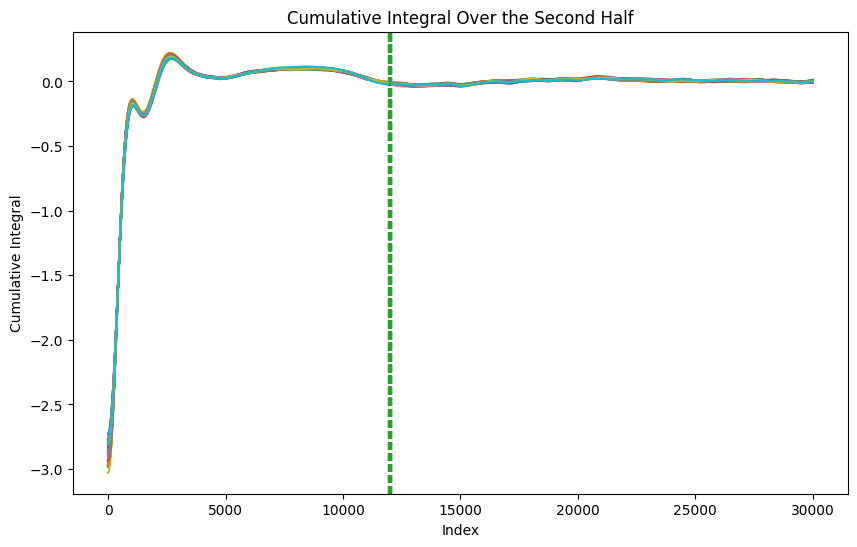

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re  # Regular expression library to extract Tr from the filename
from scipy.stats import norm
import pandas as pd

from skchange.change_detectors.moving_window import MovingWindow
# Folder containing the data files
folder_path = 'single_data'

# List all files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.dat')]

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Loop over all the .dat files
lista=[]
lista_t=[]
for file in files:
    if "iter" in file:
        file_path = os.path.join(folder_path, file)
        
        # Extract Tr value from the filename using a regular expression
        match = re.search(r'Tr_([0-9.]+)', file)
        if match:
            # Ensure there are no trailing characters like a period
            Tr_str = match.group(1).strip('.')
            try:
                Tr = float(Tr_str)  # Convert the cleaned Tr value to float
            except ValueError:
                print(f"Error: Couldn't convert Tr value '{Tr_str}' to float in filename {file}, skipping...")
                continue
        else:
            print(f"Warning: Couldn't extract Tr from filename {file}, skipping...")
            continue
        
        # Read the data from the file (assuming two columns)
        data = np.loadtxt(file_path)
        
        # Check if the file has two columns
        if data.shape[1] != 2:
            print(f"Warning: {file} doesn't have exactly two columns, skipping...")
            continue
        
        # Extract the two columns
        x = data[:, 0]
        y = data[:, 1]
        
        # Divide x and y by the difference between Tr and 1
    
        divisor = Tr - 1
        x_normalized = x / divisor
        y_normalized = y / divisor
        lista_t.append(divisor)
    

        # Plot the integral function
        df=pd.DataFrame(x_normalized[:30000])
        detector = MovingWindow(bandwidth=10000,min_detection_interval=1000)
        predicted_change_points=detector.fit_predict(df)
        plt.plot(df[:30000])
        print(predicted_change_points)
        for i, cp in enumerate(predicted_change_points):
            print(predicted_change_points)
            label = "Predicted Change Points" if i == 0 else None
            plt.axvline(cp, color="tab:green", linestyle="--", label=label)
        lista.append(y_normalized[predicted_change_points[0]])


        plt.xlabel("Index")
        plt.ylabel("Cumulative Integral")
        plt.title("Cumulative Integral Over the Second Half")
        plt.grid()
        #plt.legend()
        
        
       
        # Plot histogram
        # plt.hist(second_half, bins=30, density=True, alpha=0.6, label='Histogram (Second Half)')

        # # Generate Gaussian curve
        # x_vals = np.linspace(min(second_half), max(second_half), 500)
        # gaussian_curve = norm.pdf(x_vals, mean, std_dev)

        # # Plot Gaussian
        # plt.plot(x_vals, gaussian_curve, label='Gaussian Fit', color='red')


test=predicted_change_points[0]
folder_path = 'save_data'

# List all files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.dat')]


# Loop over all the .dat files

# for file in files:
#     if "test" in file:
#         file_path = os.path.join(folder_path, file)
        
#         # Extract Tr value from the filename using a regular expression
#         match = re.search(r'Tr_([0-9.]+)', file)
#         if match:
#             # Ensure there are no trailing characters like a period
#             Tr_str = match.group(1).strip('.')
#             try:
#                 Tr = float(Tr_str)  # Convert the cleaned Tr value to float
#             except ValueError:
#                 print(f"Error: Couldn't convert Tr value '{Tr_str}' to float in filename {file}, skipping...")
#                 continue
#         else:
#             print(f"Warning: Couldn't extract Tr from filename {file}, skipping...")
#             continue
        
#         # Read the data from the file (assuming two columns)
#         data = np.loadtxt(file_path)
        
#         # Check if the file has two columns
#         if data.shape[1] != 2:
#             print(f"Warning: {file} doesn't have exactly two columns, skipping...")
#             continue
        
#         # Extract the two columns
#         x = data[:, 0]
#         y = data[:, 1]
        
#         # Divide x and y by the difference between Tr and 1
    
#         divisor = Tr - 1
#         x_normalized = x / divisor
#         y_normalized = y / divisor
#         lista_t.append(divisor)
    

#         # Plot the integral function
#         df=pd.DataFrame(x_normalized[:30000])
#         detector = MovingWindow(bandwidth=10000,min_detection_interval=1000)
#         predicted_change_points=detector.fit_predict(df)
#         plt.plot(df[:30000])
#         print(predicted_change_points)
#         for i, cp in enumerate(predicted_change_points):
#             print(predicted_change_points)
#             label = "Predicted Change Points" if i == 0 else None
#             plt.axvline(cp, color="tab:green", linestyle="--", label=label)
#         lista.append(y_normalized[test])
#         plt.xlabel("Index")
#         plt.ylabel("Cumulative Integral")
#         plt.title("Cumulative Integral Over the Second Half")
#         plt.grid()
#         #plt.legend()
        
        
       
#         # Plot histogram
#         # plt.hist(second_half, bins=30, density=True, alpha=0.6, label='Histogram (Second Half)')

#         # # Generate Gaussian curve
#         # x_vals = np.linspace(min(second_half), max(second_half), 500)
#         # gaussian_curve = norm.pdf(x_vals, mean, std_dev)

#         # # Plot Gaussian
#         # plt.plot(x_vals, gaussian_curve, label='Gaussian Fit', color='red')


# # Add labels and title
# plt.xlabel('Column 1 (X) Normalized')
# plt.ylabel('Column 2 (Y) Normalized')
# plt.title('Normalized Data from All .dat Files in "save_data"')


# Display legend
#plt.legend()
folder_path = 'save_data'
print(np.std(lista))
# List all files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.dat')]

# Create a figure for the plot
# Show the plot
plt.show()

Slope: -0.4266 ± 0.0015
Intercept: 0.0001 ± 0.0001


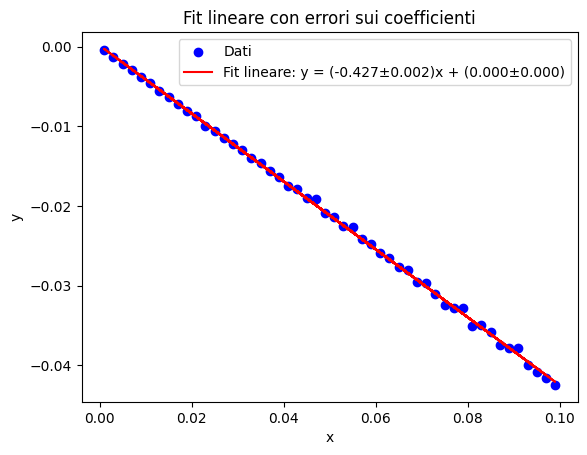

In [7]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Dati
x = np.array(lista_t)
y = np.array(lista)*np.array(lista_t)  # y = 2x

# Fit lineare
result = linregress(x, y)
slope = result.slope
intercept = result.intercept
r_value = result.rvalue
stderr = result.stderr

# Calcolo degli errori sui coefficienti
n = len(x)  # Numero di punti
y_fit = slope * x + intercept
residuals = y - y_fit
residual_std = np.sqrt(np.sum(residuals**2) / (n - 2))  # Deviazione standard residua

# Errori sui coefficienti
slope_error = residual_std / np.sqrt(np.sum((x - np.mean(x))**2))
intercept_error = residual_std * np.sqrt(1 / n + np.mean(x)**2 / np.sum((x - np.mean(x))**2))

print(f"Slope: {slope:.4f} ± {slope_error:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_error:.4f}")

# Grafico
plt.scatter(x, y, label="Dati", color="blue")
plt.plot(x, y_fit, label=f"Fit lineare: y = ({slope:.3f}±{slope_error:.3f})x + ({intercept:.3f}±{intercept_error:.3f})", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fit lineare con errori sui coefficienti")
plt.show()

<Axes: >

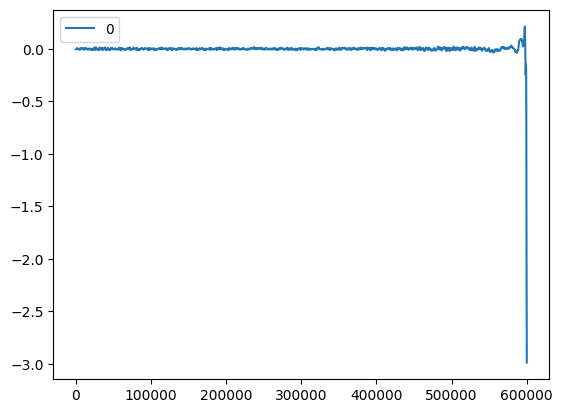

<Axes: >

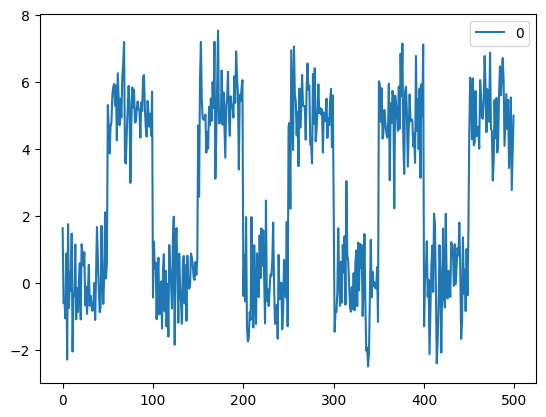

In [2]:
df.plot()